In [5]:
import glob
import numpy as np
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
###Path to dataset
path="/content/drive/Shared drives/BTP_Arya/DATABC_32"

In [8]:

IMG_DIM = (224,224)
### Using Glob to read the images and then converting into array and then to numpy array
train_files = glob.glob(path+'/train/*')
print(len(train_files))

train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
print('Train dataset shape:', train_imgs.shape)

### Using Glob to read the images and then converting into array and then to numpy array
validation_files = glob.glob(path+'/test/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
print('Validation dataset shape:', validation_imgs.shape)



1354
Train dataset shape: (1354, 224, 224, 3)
Validation dataset shape: (659, 224, 224, 3)


In [ ]:
#Labelling the training and test data
train_labels = [fn.split("train/")[1].split("_")[1] for fn in train_files]
validation_labels = [fn.split("test/")[1].split("_")[1] for fn in validation_files]

(224, 224, 3)


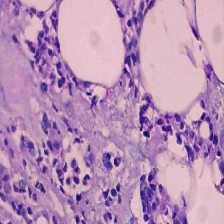

In [9]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [ ]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (224, 224, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[995:1005], train_labels_enc[995:1005])


['B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M'] [0 0 1 0 0 0 1 0 1 1]


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.models import Sequential 
### updated
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
###using image generator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['M', 'M', 'M', 'M', 'M']


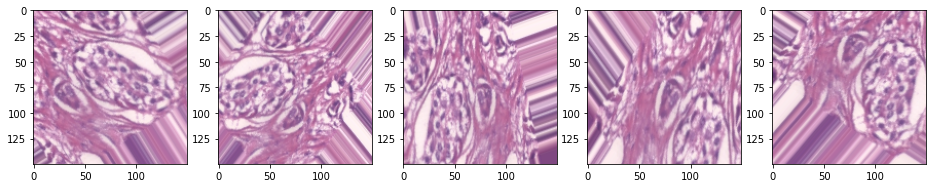

In [ ]:
img_id = 1
img_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],batch_size=1)
img = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in img])
l = [ax[i].imshow(img[i][0][0]) for i in range(0,5)]

In [ ]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (224, 224, 3)

In [ ]:
from tensorflow.keras.applications import vgg16 #tensorflow.keras use kar instead of keras
from tensorflow.keras.models import Model
import tensorflow.keras


In [ ]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option("max_colwidth", 0)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

58892288/58889256 [==============================] - 1s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f964e3e00f0>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f964e3e01d0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f964e3e0a58>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f964e3e0ba8>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f95d47b9b38>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f964e359978>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f95d470b208>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f95d4772f28>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f961479ba90>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f95d4726c88>,block3_conv3,False


In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (1354, 8192) 	Validation Bottleneck Features: (659, 8192)


In [ ]:
from tensorflow.keras.layers import InputLayer

In [ ]:
#VGG Model
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##training
history = model.fit(x=train_features_vgg, y=train_labels_enc,validation_data=(validation_features_vgg, validation_labels_enc),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/30
46/46 [==============================] - 0s 6ms/step - loss: 0.6327 - accuracy: 0.6773 - val_loss: 0.6523 - val_accuracy: 0.7071
Epoch 2/30
46/46 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.7312 - val_loss: 0.5847 - val_accuracy: 0.7178
Epoch 3/30
46/46 [==============================] - 0s 5ms/step - loss: 0.4910 - accuracy: 0.7452 - val_loss: 0.6046 - val_accuracy: 0.6631
Epoch 4/30
46/46 [==============================] - 0s 5ms/step - loss: 0.4600 - accuracy: 0.7880 - val_loss: 0.6595 - val_accuracy: 0.7269
Epoch 5/30
46/46 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.8161 - val_loss: 0.8610 - val_accuracy: 0.7193
Epoch 6/30
46/46 [==============================] - 0s 5ms/step - loss: 0.3773 - accuracy: 0.8168 - val_loss: 0.6200 - val_accuracy: 0.6889
Epoch 7/30
46/46 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8456 - val_loss: 0.6381 - val_accuracy: 0.7572
Epoch 8/30
46/46 [==

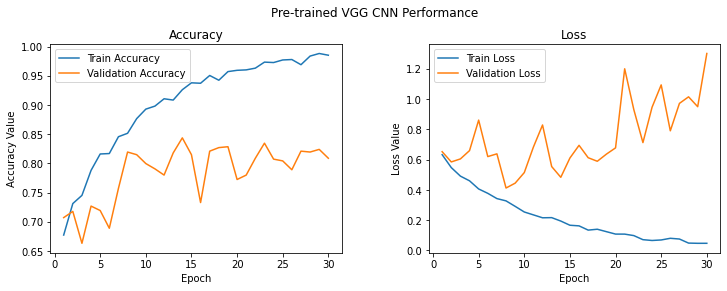

In [ ]:
###Plotting the graph
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained VGG CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [2]:
loss,acc = model.evaluate(validation_imgs,  validation_labels_enc, verbose=2)
print("accuracy: {:5.2f}%".format(100*acc))

accuracy: 80.88%


In [ ]:
###test vgg model trained for 100 epochs
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,validation_data=val_generator, validation_steps=50,verbose=1)

Epoch 1/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6347 - accuracy: 0.6750 - val_loss: 0.5676 - val_accuracy: 0.7054
Epoch 2/100
100/100 [==============================] - 16s 164ms/step - loss: 0.5948 - accuracy: 0.6930 - val_loss: 0.5248 - val_accuracy: 0.7257
Epoch 3/100
100/100 [==============================] - 16s 161ms/step - loss: 0.5669 - accuracy: 0.7178 - val_loss: 0.5049 - val_accuracy: 0.7385
Epoch 4/100
100/100 [==============================] - 16s 160ms/step - loss: 0.5483 - accuracy: 0.7283 - val_loss: 0.4770 - val_accuracy: 0.7508
Epoch 5/100
100/100 [==============================] - 16s 165ms/step - loss: 0.5297 - accuracy: 0.7415 - val_loss: 0.4739 - val_accuracy: 0.7395
Epoch 6/100
100/100 [==============================] - 16s 163ms/step - loss: 0.5056 - accuracy: 0.7531 - val_loss: 0.4784 - val_accuracy: 0.7437
Epoch 7/100
100/100 [==============================] - 16s 163ms/step - loss: 0.4983 - accuracy: 0.7646 - val_loss: 0.4617 -

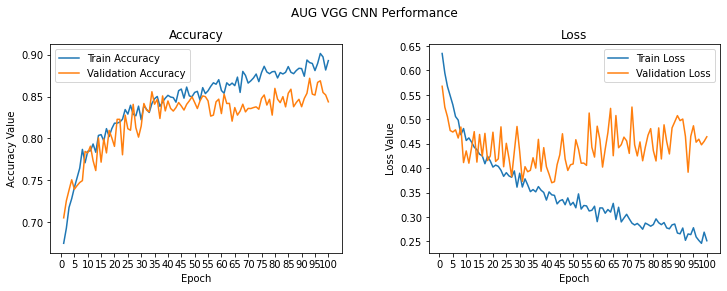

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('AUG VGG CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
###0.8669